In [4]:
import os, shutil
train_dir = 'C:/Users/flavi/Desktop/Projeto-20240530/train'
validation_dir = 'C:/Users/flavi/Desktop/Projeto-20240530/validation'
test_dir = 'C:/Users/flavi/Desktop/Projeto-20240530/test'

In [5]:
from keras.utils import image_dataset_from_directory
IMG_SIZE = 150
train_dataset = image_dataset_from_directory(
train_dir,
image_size=(IMG_SIZE, IMG_SIZE),
batch_size=32)
validation_dataset = image_dataset_from_directory(
validation_dir,
image_size=(IMG_SIZE, IMG_SIZE),
batch_size=32)
test_dataset = image_dataset_from_directory(
test_dir,
image_size=(IMG_SIZE, IMG_SIZE),
batch_size=32)

Found 40000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


In [8]:
from tensorflow import keras
from keras import layers
from keras import models
from keras.preprocessing import image

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)


In [9]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [3]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_lr=0.001
)

In [2]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [10]:
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=[reduce_lr, early_stopping]
)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 241s 192ms/step - accuracy: 0.2518 - loss: 2.0021 - val_accuracy: 0.3764 - val_loss: 1.7074 - learning_rate: 0.0010
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 217s 173ms/step - accuracy: 0.3797 - loss: 1.7047 - val_accuracy: 0.4455 - val_loss: 1.5206 - learning_rate: 0.0010
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 217s 174ms/step - accuracy: 0.4301 - loss: 1.5834 - val_accuracy: 0.4845 - val_loss: 1.4147 - learning_rate: 0.0010
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 215s 172ms/step - accuracy: 0.4565 - loss: 1.5114 - val_accuracy: 0.5202 - val_loss: 1.3401 - learning_rate: 0.0010
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 215s 172ms/step - accuracy: 0.4830 - loss: 1.4418 - val_accuracy: 0.5266 - val_loss: 1.3296 - learning_rate: 0.0010
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 224s 179ms/step - accuracy: 0.5036 - loss: 1.3825 - val_accuracy: 0.5445 - val_loss: 1.2777 - learning_rate: 0.0010
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 225s 180ms

In [21]:
model.save('C:/Users/flavi/Desktop/Projeto-20240530/modeloSComData.keras')


In [12]:
import tensorflow as tf

# Load the model from the .keras file
model = tf.keras.models.load_model('C:/Users/flavi/Desktop/Projeto-20240530/modeloSComData.keras')

# Verify the model structure
model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,373,216 (39.57 MB)

 Trainable params: 3,457,738 (13.19 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,915,478 (26.38 MB)

In [13]:
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=[reduce_lr, early_stopping]
)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 220s 175ms/step - accuracy: 0.6757 - loss: 0.9256 - val_accuracy: 0.6586 - val_loss: 0.9971 - learning_rate: 0.0010
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 216s 173ms/step - accuracy: 0.6736 - loss: 0.9316 - val_accuracy: 0.6734 - val_loss: 0.9537 - learning_rate: 0.0010
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 209s 167ms/step - accuracy: 0.6692 - loss: 0.9287 - val_accuracy: 0.6693 - val_loss: 0.9458 - learning_rate: 0.0010
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 208s 166ms/step - accuracy: 0.6772 - loss: 0.9127 - val_accuracy: 0.6669 - val_loss: 0.9855 - learning_rate: 0.0010
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 208s 166ms/step - accuracy: 0.6771 - loss: 0.9224 - val_accuracy: 0.6716 - val_loss: 0.9510 - learning_rate: 0.0010
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 207s 166ms/step - accuracy: 0.6818 - loss: 0.9140 - val_accuracy: 0.6765 - val_loss: 0.9402 - learning_rate: 0.0010
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 208s 166ms

In [14]:
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=[reduce_lr, early_stopping]
)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 209s 167ms/step - accuracy: 0.6833 - loss: 0.9046 - val_accuracy: 0.6757 - val_loss: 0.9464 - learning_rate: 0.0010
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 208s 166ms/step - accuracy: 0.6806 - loss: 0.9097 - val_accuracy: 0.6855 - val_loss: 0.9324 - learning_rate: 0.0010
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 209s 167ms/step - accuracy: 0.6855 - loss: 0.9024 - val_accuracy: 0.6691 - val_loss: 0.9608 - learning_rate: 0.0010
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 209s 168ms/step - accuracy: 0.6865 - loss: 0.9045 - val_accuracy: 0.6758 - val_loss: 0.9403 - learning_rate: 0.0010
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 216s 173ms/step - accuracy: 0.6861 - loss: 0.9027 - val_accuracy: 0.6648 - val_loss: 0.9688 - learning_rate: 0.0010
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 217s 173ms/step - accuracy: 0.6856 - loss: 0.8969 - val_accuracy: 0.6763 - val_loss: 0.9450 - learning_rate: 0.0010
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 205s 164ms

In [15]:
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=[reduce_lr, early_stopping]
)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 228s 182ms/step - accuracy: 0.6847 - loss: 0.8952 - val_accuracy: 0.6804 - val_loss: 0.9382 - learning_rate: 0.0010
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 217s 173ms/step - accuracy: 0.6894 - loss: 0.8815 - val_accuracy: 0.6881 - val_loss: 0.9219 - learning_rate: 0.0010
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 230s 184ms/step - accuracy: 0.6882 - loss: 0.8922 - val_accuracy: 0.6714 - val_loss: 0.9553 - learning_rate: 0.0010
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 218s 174ms/step - accuracy: 0.6945 - loss: 0.8768 - val_accuracy: 0.6759 - val_loss: 0.9563 - learning_rate: 0.0010
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 223s 178ms/step - accuracy: 0.6852 - loss: 0.8880 - val_accuracy: 0.6844 - val_loss: 0.9212 - learning_rate: 0.0010


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


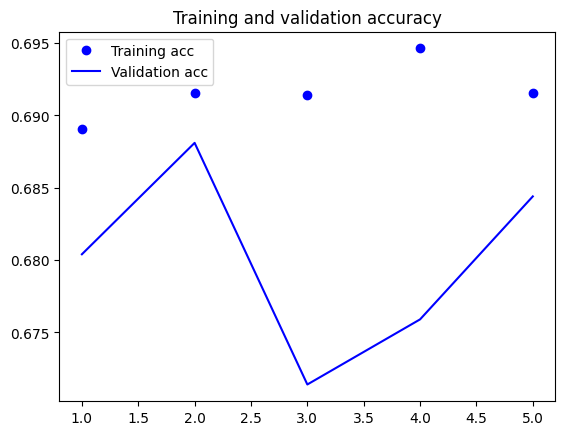

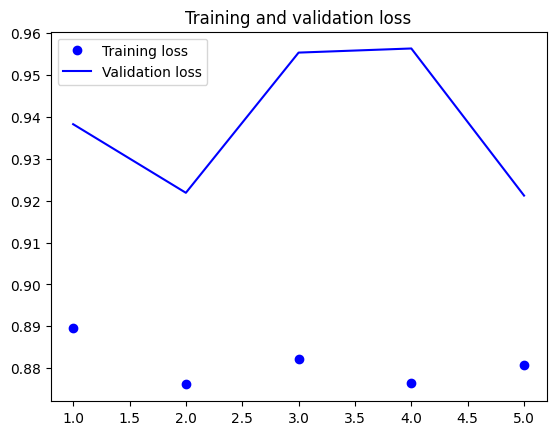

In [16]:
import matplotlib.pyplot as plt
print(history.history.keys())
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

